# MD5 check

In [35]:
import os
from multiprocessing import Pool
import subprocess

file_list=[]
for file_ in os.listdir('fq'):
    if file_.endswith('fq.gz'):
        file_list.append(file_)

def md5sum(file_):
    return subprocess.check_output('md5sum fq/%s' % file_, shell=True).decode('utf-8')

pool = Pool(50)
md5_list = pool.map(md5sum, file_list)
pool.close()
pool.join()

with open('md5_danny.txt', 'w') as f:
    for md5 in md5_list:
        f.write(md5)

In [36]:
transfer_md5 = {}
with open('md5_lv.txt') as f:
    for line in f:
        (key, val) = line.split()
        transfer_md5[val.replace('lv/','')] = key

org_md5 = {}
with open('lv/md5sum_lv_gene_exp.txt') as f:
    for line in f:
        (key, val) = line.split()
        org_md5[val.split('/')[-1]]=key

for key in org_md5:
    if key not in transfer_md5 or org_md5[key] != transfer_md5[key]:
        print(key)

15V_post.s_5_FFPF_sequence.txt.gz
15V_pre.s_3_FFPF_sequence.txt.gz
18V_post.s_0_FFPF_sequenceGTCT.txt.gz
18V_pre.s_0_FFPF_sequenceCGTT.txt.gz
22V_post.s_6_FFPF_sequence.txt.gz
22V_pre.s_5_FFPF_sequence.txt.gz
25V_post.s_5_FFPF_sequence.txt.gz
25V_pre.s_3_FFPF_sequence.txt.gz
26V_post.s_8_FFPF_sequence.txt.gz
26V_pre.s_7_FFPF_sequence.txt.gz
27V_post.s_0_FFPF_sequenceAGCT.txt.gz
27V_pre.s_0_FFPF_sequenceAACT.txt.gz
2V_pre.A_1.fq.gz_pairs_R1.fastq.gz
2V_pre.A_1.fq.gz_singles.fastq.gz
2V_pre.A_2.fq.gz_pairs_R2.fastq.gz
37V_post.s_5_FFPF_sequence.txt.gz
37V_pre.s_5_FFPF_sequence.txt.gz
39V_post.s_5_FFPF_sequence.txt.gz
39V_pre.s_5_FFPF_sequence.txt.gz
43V_post.s_5_FFPF_sequence.txt.gz
43V_pre.s_5_FFPF_sequence.txt.gz
45V_post.s_5_FFPF_sequence.txt.gz
45V_pre.s_5_FFPF_sequence.txt.gz
4V_post.s_2_FFPF_sequence.txt.gz
4V_pre.s_1_FFPF_sequence.txt.gz
6V_post.s_6_FFPF_sequence.txt_.txt.gz
6V_pre.s_5_FFPF_sequence.txt_.txt.gz
9V_post.A_1.fq.gz_pairs_R1.fastq.gz
9V_post.A_1.fq.gz_singles.fastq.gz

In [37]:
transfer_md5 = {}
with open('md5_danny.txt') as f:
    for line in f:
        (key, val) = line.split()
        transfer_md5[val.replace('fq/','')] = key

org_md5 = {}
with open('md5sum_danny_seidman.txt') as f:
    for line in f:
        (key, val) = line.split()
        org_md5[val.split('/')[-1]]=key

for key in org_md5:
    if key not in transfer_md5 or org_md5[key] != transfer_md5[key]:
        print(key)

In [40]:
danny_md5 = {}
with open('md5_danny.txt') as f:
    for line in f:
        (key, val) = line.split()
        danny_md5[val.replace('fq/','')] = key

lv_md5 = {}
with open('md5_lv.txt') as f:
    for line in f:
        (key, val) = line.split()
        lv_md5[val.split('/')[-1]]=key

for key in lv_md5:
    if key in transfer_md5 :
        print(key,danny_md5[key] == lv_md5[key])

140115-FC831-L1-ATCACG--Danny--47V_pre--Hs--R1.fq.gz True
140115-FC831-L1-CGATGT--Danny--47V_post--Hs--R2.fq.gz True
140115-FC831-L1-CGATGT--Danny--47V_post--Hs--R1.fq.gz True
140115-FC831-L1-ATCACG--Danny--47V_pre--Hs--R2.fq.gz True
141112-FC01249-L1-N706-S501--Danny--151V_pre--Hs--R2.fq.gz False
141112-FC01249-L1-N706-S501--Danny--151V_pre--Hs--R1.fq.gz False
141112-FC01249-L1-N706-S503--Danny--157V_pre--Hs--R1.fq.gz False
141112-FC01249-L1-N706-S502--Danny--153V_post--Hs--R1.fq.gz False
141112-FC01249-L1-N706-S502--Danny--153V_post--Hs--R2.fq.gz False
140115-FC831-L2-TAAGGCGA-CTCTCTAT--Danny--47V_pre_nextera--Hs--R1.fq.gz True
140115-FC831-L2-CGTACTAG-CTCTCTAT--Danny--47V_post_nextera--Hs--R1.fq.gz True
140115-FC831-L2-GGACTCCT-CTCTCTAT--Danny--96V_post_nextera--Hs--R1.fq.gz True
140115-FC831-L2-CGTACTAG-CTCTCTAT--Danny--47V_post_nextera--Hs--R2.fq.gz True
140115-FC831-L2-GGACTCCT-CTCTCTAT--Danny--96V_post_nextera--Hs--R2.fq.gz True
140115-FC831-L2-TCCTGAGC-CTCTCTAT--Danny--96V_pre_

# Merge files

In [1]:
import os
from collections import defaultdict
to_copy=defaultdict(list)

for line in open('data/archive/sample_table.txt'):
    info = line.split()
    file_n=info[0]+'_'+info[2]+'.fq.gz'
    to_copy[file_n].append('data/archive/'+info[1])
mapping=[]
for key in to_copy:
    mapping.append([key,to_copy[key]])

In [ ]:
def process_one(args): 
    file_n,files = args
    print(file_n)
    if len(files) == 1:
        os.system('cp %s data/raw/%s' % (files[0],file_n))
    else:
        os.system('cat %s > data/raw/%s' % (' '.join(files),file_n))


from multiprocessing import Pool
pool = Pool(50)
pool.map(process_one, mapping)
pool.close()
pool.join()


In [1]:
%load_ext rpy2.ipython

# Generate sample table

In [69]:
import os
import pandas as pd 

covariants=pd.read_csv('data/sample_info/sample_covariants.txt',sep='\t')

# covariants['Study ID_Full BloodID']=[x.replace('B000','').replace('B00','').replace('B0','').replace('B','') for x in covariants['Study ID_Full BloodID']]
covariants.index=covariants['Study ID_#V']
cov=covariants.loc[:,['Smoker - At any time in the past?','Treated?','Diabetes','Pulmonary Disease','Renal Disease']]
cov.head()

,Smoker - At any time in the past?,Treated?,Diabetes,Pulmonary Disease,Renal Disease
Study ID_#V,,,,,
2V,Yes,NaN,No DM,COPD,None
3V,Yes,NaN,No DM,COPD,None
4V,No,NaN,No DM,None,None
6V,Yes,NaN,No DM,COPD,None
8V,No,NaN,NIDDM with diet,None,None


In [77]:
import os
import pandas as pd 


files=os.listdir('data/raw/')
samples=set([x.replace('_R1.fq.gz','').replace('_R2.fq.gz','') for x in files])
for sample in samples:
    to_have=[f"{sample}_R{y}.fq.gz"  for y in ['1','2']]
    if  any([x not in files for x in to_have]):
        print(sample,end=',')

biosamples=set([x.split('_')[0] for x in samples])
surgical_time=pd.read_csv('data/sample_info/surgical_time.txt',sep='\t')
surgical_time['Study ID']=[x.replace('B000','').replace('B00','').replace('B0','').replace('B','') for x in surgical_time['Study ID']]
for x in biosamples:
    if x not in surgical_time['Study ID'].to_list():
        print(x,end=';')
# surgical_time['Surgery Time (incision)']=[float(x.replace(':','.')) for x in surgical_time['Surgery Time (incision)']]

# tmp=[]
# for x in surgical_time['Surgery Time (incision)']:
#     if 8<=x<=12:
#         tmp.append('AM')
#     elif 15<=x<=21:
#         tmp.append('PM')
#     else:
#         tmp.append('INTER')
# surgical_time['Group']=tmp

surgical_time['Time']=surgical_time['Time'].replace('Intermediate','INTER')
surgical_time['Time']=surgical_time['Time'].replace('Morning','AM')
surgical_time['Time']=surgical_time['Time'].replace('Afternoon','PM')

sample_dict=surgical_time[['Study ID','Time']]
sample_dict.index=sample_dict['Study ID']
sample_dict=sample_dict['Time'].to_dict()
to_diff=[]

for sample in biosamples:
    if sample in sample_dict and sample_dict[sample]!="INTER":
        if sample not in ['155V', '147V', '36V' ,'16V']:
            to_diff.append([sample+'_pre',sample_dict[sample],'Pre',sample])
            to_diff[-1].extend(cov.loc[sample,:].to_list())
            to_diff.append([sample+'_post',sample_dict[sample],'Post',sample])
            to_diff[-1].extend(cov.loc[sample,:].to_list())

to_diff=pd.DataFrame(to_diff,columns=['Sample','Time','Group','Study ID','Smoker','Treated','Diabetes','Pulmonary Disease','Renal Disease'])
to_diff.to_csv('data/sample_info/to_diff.txt',sep='\t',index=False)

t2g=pd.read_csv('data/kallisto_bs/'+sample+'_pre/abundance.tsv',sep='\t')
t2g['GENEID']=[x.split('|')[1] for x in t2g['target_id']]
t2g['GENENAME']=[x.split('|')[5] for x in t2g['target_id']]
t2g['TYPE']=[x.split('|')[7] for x in t2g['target_id']]
t2g['TXNAME']=t2g['target_id']
t2g=t2g[['TXNAME','GENEID','GENENAME','TYPE']]
t2g.to_csv('data/sample_info/t2g.txt',sep='\t',index=False)

3V;49V;90V;12V;13V;67V;28V;63V;9V;42V;2V;17V;24V;60V;89V;86V;81V;88V;30V;82V;14V;59V;

# QC

In [177]:
%%bash
cd data/fastqc_trimmed/
ls | grep zip | xargs -n 1 unzip

Archive:  100V_post_R1_fastqc.zip
   creating: 100V_post_R1_fastqc/
   creating: 100V_post_R1_fastqc/Icons/
   creating: 100V_post_R1_fastqc/Images/
  inflating: 100V_post_R1_fastqc/Icons/fastqc_icon.png  
  inflating: 100V_post_R1_fastqc/Icons/warning.png  
  inflating: 100V_post_R1_fastqc/Icons/error.png  
  inflating: 100V_post_R1_fastqc/Icons/tick.png  
  inflating: 100V_post_R1_fastqc/summary.txt  
  inflating: 100V_post_R1_fastqc/Images/per_base_quality.png  
  inflating: 100V_post_R1_fastqc/Images/per_tile_quality.png  
  inflating: 100V_post_R1_fastqc/Images/per_sequence_quality.png  
  inflating: 100V_post_R1_fastqc/Images/per_base_sequence_content.png  
  inflating: 100V_post_R1_fastqc/Images/per_sequence_gc_content.png  
  inflating: 100V_post_R1_fastqc/Images/per_base_n_content.png  
  inflating: 100V_post_R1_fastqc/Images/sequence_length_distribution.png  
  inflating: 100V_post_R1_fastqc/Images/duplication_levels.png  
  inflating: 100V_post_R1_fastqc/Images/adapter_conte

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   creating: 80V_pre_R1_fastqc/
   creating: 80V_pre_R1_fastqc/Icons/
   creating: 80V_pre_R1_fastqc/Images/
  inflating: 80V_pre_R1_fastqc/Icons/fastqc_icon.png  
  inflating: 80V_pre_R1_fastqc/Icons/warning.png  
  inflating: 80V_pre_R1_fastqc/Icons/error.png  
  inflating: 80V_pre_R1_fastqc/Icons/tick.png  
  inflating: 80V_pre_R1_fastqc/summary.txt  
  inflating: 80V_pre_R1_fastqc/Images/per_base_quality.png  
  inflating: 80V_pre_R1_fastqc/Images/per_tile_quality.png  
  inflating: 80V_pre_R1_fastqc/Images/per_sequence_quality.png  
  inflating: 80V_pre_R1_fastqc/Images/per_base_sequence_content.png  
  inflating: 80V_pre_R1_fastqc/Images/per_sequence_gc_content.png  
  inflating: 80V_pre_R1_fastqc/Images/per_base_n_content.png  
  inflating: 80V_pre_R1_fastqc/Images/sequence_length_distribution.png  
  inflating: 80V_pre_R1_fastqc/Images/duplication_levels.png  
  inflating: 80V_pre_R1_fastqc/Images/adapter_content.png  
  inflating: 80V_pre_R1_fastqc/fastqc_report.html  
  infla

In [178]:
import pandas as pd

samples=[]
for x in os.listdir('data/raw/'):
        samples.append(x.replace('_R1.fq.gz','').replace('_R2.fq.gz',''))
        
samples=list(set(samples))
quality=[]
gc=[]
read_length=[]

for sample in samples:
    tmp_quality=[]
    tmp_gc=[]
    tmp_read_length=[]

    for x in ['1','2']:
        f=open('data/fastqc_trimmed/'+sample+'_R'+x+'_fastqc/fastqc_data.txt')
        for line in f:
            if line.startswith('%GC'):
                tmp_gc.append(float(line.split('\t')[1]))
            elif line.startswith('Sequence length'):
                if '-' in line:
                    tmp_read_length.append(np.mean([float(line.split('\t')[1].split('-')[1]) , float(line.split('\t')[1].split('-')[0])]))
                else:
                    tmp_read_length.append(float(line.split('\t')[1]))
            elif line.startswith('>>Per base sequence quality'):
                for line in f:
                    if line.startswith('>>END_MODULE'):
                        break
                    elif line.startswith('#'):
                        continue
                    tmp_quality.append(float(line.split('\t')[1]))
        f.close()
    quality.append(sum(tmp_quality)/len(tmp_quality))
    gc.append(sum(tmp_gc)/len(tmp_gc))
    read_length.append(sum(tmp_read_length)/len(tmp_read_length))
    
matrix=pd.DataFrame([samples,quality,gc,read_length]).T
matrix.columns=['Sample','Quality','GC','Read_length']
matrix.to_csv('data/sample_info/quality_trimmed.txt',sep='\t',index=False)

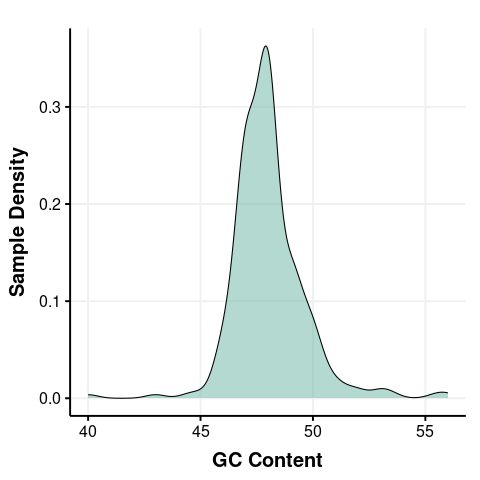

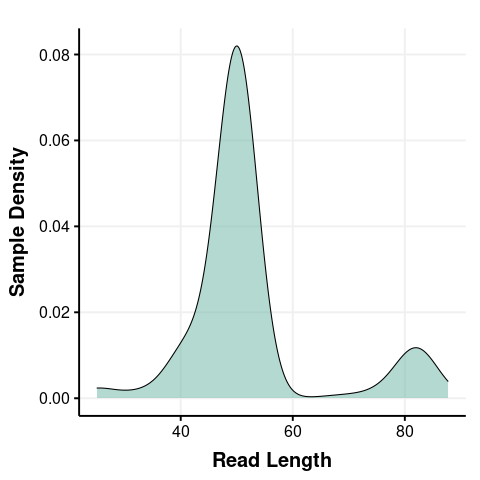

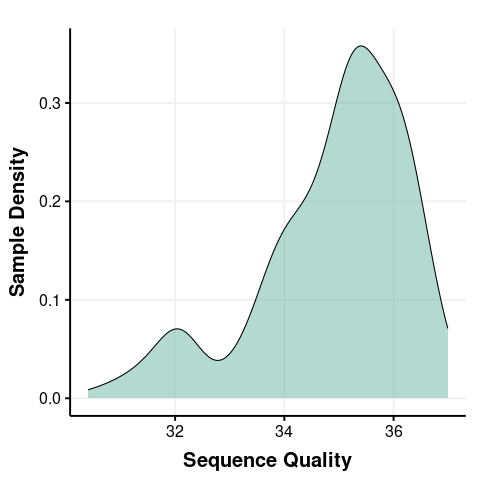

In [179]:
%%R
library(ggplot2)

df<-read.table('data/sample_info/quality_trimmed.txt',sep='\t',header=T)
df<-df[order(df$Read_length),]
df$GC<-as.numeric(as.character(df$GC))
p1<-ggplot(df)+
    geom_density(aes(x=GC, y = ..density..),alpha=0.5,fill="#69b3a2" )+
    theme(legend.position="none")+theme_Publication()+ylab('Sample Density')+xlab('GC Content')

p2<-ggplot(df)+
    geom_density(aes(x=Read_length, y = ..density..),alpha=0.5,fill="#69b3a2" )+
    theme(legend.position="none")+theme_Publication()+ylab('Sample Density')+xlab('Read Length')

p3<-ggplot(df)+
    geom_density(aes(x=Quality, y = ..density..),alpha=0.5,fill="#69b3a2" )+
    theme(legend.position="none")+theme_Publication()+ylab('Sample Density')+xlab('Sequence Quality')

print(p1)
print(p2)
print(p3)


## DESeq2 pipeline

In [2]:
%%R
library(ggpubr)
library(ggthemes)
library(ggplot2)
library(ComplexHeatmap)
library(circlize)
library(tximport)
library(DESeq2)

theme_Publication <- function(base_size=20, base_family="") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.5, "cm"),
               legend.margin = unit(0, "cm"),
#                legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

scale_fill_Publication <- function(...){
      library(scales)
      discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506",
                                                                "#a6cee3","#fb9a99","#984ea3","#ffff33",'#6060f4','#ad27ad',"#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506",
                                                                "#a6cee3","#fb9a99","#984ea3","#ffff33",'#6060f4','#ad27ad')), ...)
}

scale_fill_Publication_continuous <- function(...){
      library(scales)
      continuous_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506",
                                                                "#a6cee3","#fb9a99","#984ea3","#ffff33",'#6060f4','#ad27ad')), ...)
}

scale_colour_Publication <- function(...){
      library(scales)
      discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506",
                                                                  "#a6cee3","#fb9a99","#984ea3","#ffff33",'#6060f4','#ad27ad')), ...)
}
scale_colour_Publication_continuous <- function(...){
      library(scales)
      continuous_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f"), ...))
}

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: grid

R[write to console]: ========================================
ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


R[write to console]: ========================================
circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Document

## AM v.s. PM

In [157]:
%%R
sample_info<-read.table('data/sample_info/to_diff.txt',sep='\t',header=T)
sample_info$Cate<-paste(sample_info$Time,sample_info$Group,sep='_')
sample_info[sample_info$Treated=='','Treated']<-'NA'
sample_info$Patient<-apply(sample_info,1,function(x) strsplit(x[1],'_')[[1]][1]) 

quality<-read.table('data/sample_info/quality.txt',sep='\t',header=T)
rownames(quality)<-quality$Sample
sample_info[c('Quality', 'GC', 'Read_length')]<-quality[sample_info$Sample,c('Quality', 'GC', 'Read_length')]

kal_dirs <- file.path("data/kallisto", sample_info$Sample,'/abundance.h5')
t2g<-read.table('data/sample_info/t2g.txt',sep='\t',header=T)
protein_coding<-t2g[t2g$TYPE=='protein_coding','GENENAME']
g2n<-t2g[,c('GENEID','GENENAME')]
g2n<-g2n[!duplicated(g2n$GENEID),]
t2g<-t2g[,c('TXNAME','GENEID')]
rownames(g2n)<-g2n$GENEID

txi <- tximport(kal_dirs, type = "kallisto", tx2gene = t2g)
colnames(txi$counts)<-sample_info$Sample

dds <- DESeqDataSetFromTximport(txi, sample_info, ~Cate+Read_length)
keep <- rowSums(counts(dds) > 0) >= 41
dds <- DESeq(dds)
dds<-dds[keep,]

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 7 
R[write to console]: 8 
R[write to console]: 9 
R[write to console]: 10 
R[write to console]: 11 
R[write to console]: 12 
R[write to console]: 13 
R[write to console]: 14 
R[write to console]: 15 
R[write to console]: 16 
R[write to console]: 17 
R[write to console]: 18 
R[write to console]: 19 
R[write to console]: 20 
R[write to console]: 21 
R[write to console]: 22 
R[write to console]: 23 
R[write to console]: 24 
R[write to console]: 25 
R[write to console]: 26 
R[write to console]: 27 
R[write to console]: 28 
R[write to console]: 29 
R[write to console]: 30 
R[write to console]: 31 
R[write to console]: 32 
R[write to console]: 33 
R[write to console]: 34 
R[write to console]: 35 
R[write to console]: 36 
R[write to console]: 37 
R[write to console]: 38 
R[write to console]: 39 
R[write to console]: 40 
R[write t

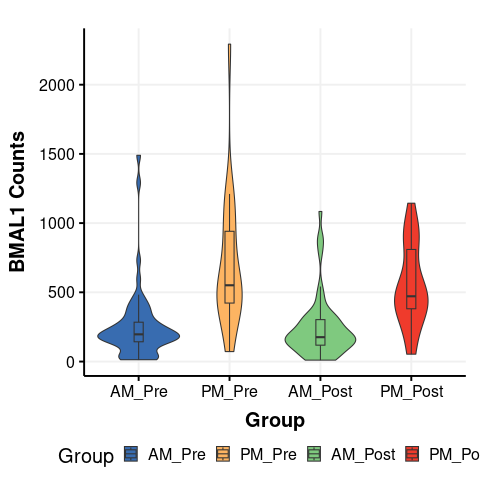

In [158]:
%%R
#ENSG00000133794.20
bmal1_counts<-assays(dds)$counts['ENSG00000133794.20',]
bmal1_counts<-rbind(as.character(dds$Cate),bmal1_counts)
bmal1_counts<-as.data.frame(t(bmal1_counts))
colnames(bmal1_counts)<-c('Group','BMAL1.Counts')
bmal1_counts$BMAL1.Counts<-as.numeric(bmal1_counts$BMAL1.Counts)
bmal1_counts$Group<-factor(bmal1_counts$Group,levels=c('AM_Pre','PM_Pre','AM_Post','PM_Post'))
p1<-ggplot(bmal1_counts,aes(x=Group,y=BMAL1.Counts,fill=Group))+geom_violin(jitter=T)+
    geom_boxplot(outlier.shape=NA,width=.1)+ylab('BMAL1 Counts')+
    theme_Publication()+scale_fill_Publication()
pdf('data/figures/bmal1_counts.pdf',width=5,height=5)
print(p1)
dev.off()
print(p1)
#+scale_y_log10()
# head(bmal1_counts)

In [164]:
%%R
head(res)

log2 fold change (MLE): Cate AM_Pre vs PM_Pre 
Wald test p-value: Cate AM_Pre vs PM_Pre 
DataFrame with 6 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat      pvalue        padj
      <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
BMAL1   272.138      -1.306749  0.175730  -7.43612 1.03687e-13 2.18807e-09
CIART   312.317       1.188507  0.160189   7.41940 1.17648e-13 2.18807e-09
PER3   1495.764       0.810524  0.120928   6.70252 2.04859e-11 2.54005e-07
PER2    553.178       0.680889  0.112214   6.06775 1.29715e-09 1.20626e-05
TEF    1452.628       0.696175  0.127311   5.46832 4.54326e-08 3.37991e-04
NR1D2  1825.865       0.687906  0.129088   5.32895 9.87812e-08 6.12394e-04


In [170]:
%%R
contrasts<-list(c('Cate','AM_Pre','PM_Pre'),c('Cate','AM_Post','PM_Post'))#,c('Cate','AM_Pre','AM_Post'),c('Cate','PM_Pre','PM_Post'))
ps<-list()
pdf('data/figures/DEG_time.pdf',width=10,height=10)

for (contrast in contrasts){
    res <- results(dds,contrast=contrast)

    rownames(res)<-g2n[rownames(res),'GENENAME']
    res<-res[res$baseMean>10,]
    res<-res[rownames(res) %in% protein_coding,]
    res<-as.data.frame(res)
    res %>% drop_na()

    uplist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange> 0.5),])
    # uplist<-rownames(res[res$Color=='UP',])
    downlist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange< -0.5),])
    # downlist<-rownames(res[res$Color=='DOWN',])
    totallist<-c(uplist,downlist)
    write.table(uplist,paste0('data/sample_info/Up_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(downlist,paste0('data/sample_info/Down_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(totallist,paste0('data/sample_info/Total_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)

    to_anno_1<-res[res$log2FoldChange> 0.5 ,]
    to_anno_1<-as.data.frame(to_anno_1)
    to_anno_1$Gene<-rownames(to_anno_1)
    to_anno_1<-to_anno_1[to_anno_1$pvalue<1e-03,]
    to_anno_1<-to_anno_1[order(to_anno_1$pvalue),]
    to_anno_1<-to_anno_1[1:5,]

    to_anno_2<-res[res$log2FoldChange <  -0.5 ,]
    to_anno_2<-as.data.frame(to_anno_2)
    to_anno_2$Gene<-rownames(to_anno_2)
    to_anno_2<-to_anno_2[to_anno_2$pvalue<1e-03,]
    to_anno_2<-to_anno_2[order(to_anno_2$pvalue),]
    to_anno_2<-to_anno_2[1:5,]
    to_anno<-rbind(to_anno_1,to_anno_2)

    res<-as.data.frame(res)
    res$Color<-'NS'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange> 0.5)]<-'UP'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange< -0.5)]<-'DOWN'
    p<-ggplot(res,aes(x=log2FoldChange,y=-log10(pvalue)))+geom_point(aes(color=Color))+
        scale_color_manual(values=c("#386cb0", "black", "#fdb462")) +geom_hline(yintercept=-log10(0.01), col="red")+geom_vline(xintercept=c(-0.5, 0.5), col="red") +
        xlab('Log2FC')+ylab('-log10(P value)')+theme_Publication()+theme(legend.position="none")+
        geom_text(data=to_anno,aes(x=log2FoldChange,y=-log10(pvalue),label=Gene),size=6,hjust=0,vjust=0)
    print(p)
    resOrdered<-res[order(res$padj),]
    resOrdered<-as.data.frame(resOrdered)
    resOrdered<-resOrdered[,1:6]
    write.csv(resOrdered,paste0('data/sample_info/DEG_',contrast[2],'_vs_',contrast[3],'.csv'))

}
dev.off()

png 
  2 


## AM pre v.s. post

In [ ]:
%%R
sample_info<-read.table('data/sample_info/to_diff.txt',sep='\t',header=T)
sample_info$Cate<-paste(sample_info$Time,sample_info$Group,sep='_')
sample_info$Patient<-apply(sample_info,1,function(x) strsplit(x[1],'_')[[1]][1])  
sample_info<-sample_info[sample_info$Time=='AM',]
quality<-read.table('data/sample_info/quality.txt',sep='\t',header=T)
rownames(quality)<-quality$Sample
sample_info[c('Quality', 'GC', 'Read_length')]<-quality[sample_info$Sample,c('Quality', 'GC', 'Read_length')]

kal_dirs <- file.path("data/kallisto", sample_info$Sample,'/abundance.h5')

t2g<-read.table('data/sample_info/t2g.txt',sep='\t',header=T)
protein_coding<-t2g[t2g$TYPE=='protein_coding','GENENAME']
g2n<-t2g[,c('GENEID','GENENAME')]
g2n<-g2n[!duplicated(g2n$GENEID),]
t2g<-t2g[,c('TXNAME','GENEID')]
rownames(g2n)<-g2n$GENEID

txi <- tximport(kal_dirs, type = "kallisto", tx2gene = t2g)
colnames(txi$counts)<-sample_info$Sample

dds_pvp_am <- DESeqDataSetFromTximport(txi, sample_info, ~Patient+Cate+Read_length)
keep <- rowSums(counts(dds_pvp_am) > 0) >= 41
dds_pvp_am <- DESeq(dds_pvp_am)
dds_pvp_am<-dds_pvp_am[keep,]

In [176]:
%%R
contrasts<-list(c('Cate','AM_Pre','AM_Post'),c('Cate','PM_Pre','PM_Post'))
ps<-list()

contrast=c('Cate','AM_Pre','AM_Post')
# for (contrast in contrasts){
    res <- results(dds_pvp_am,contrast=c('Cate','AM_Pre','AM_Post'))

    rownames(res)<-g2n[rownames(res),'GENENAME']
    res<-res[res$baseMean>10,]
    res<-res[rownames(res) %in% protein_coding,]
    res<-as.data.frame(res)

    uplist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange> 0.5),])
    downlist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange< -0.5),])
    totallist<-c(uplist,downlist)
    write.table(uplist,paste0('data/sample_info/Up_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(downlist,paste0('data/sample_info/Down_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(totallist,paste0('data/sample_info/Total_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)

    to_anno_1<-res[res$log2FoldChange> 0.5 ,]
    to_anno_1<-as.data.frame(to_anno_1)
    to_anno_1$Gene<-rownames(to_anno_1)
    to_anno_1<-to_anno_1[to_anno_1$pvalue<1e-03,]
    to_anno_1<-to_anno_1[order(to_anno_1$pvalue),]
    to_anno_1<-to_anno_1[1:5,]

    to_anno_2<-res[res$log2FoldChange <  -0.5 ,]
    to_anno_2<-as.data.frame(to_anno_2)
    to_anno_2$Gene<-rownames(to_anno_2)
    to_anno_2<-to_anno_2[to_anno_2$pvalue<1e-03,]
    to_anno_2<-to_anno_2[order(to_anno_2$pvalue),]
    to_anno_2<-to_anno_2[1:5,]
    to_anno<-rbind(to_anno_1,to_anno_2)

    res<-as.data.frame(res)
    res$Color<-'NS'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange> 0.5)]<-'UP'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange< -0.5)]<-'DOWN'
    p<-ggplot(res,aes(x=log2FoldChange,y=-log10(pvalue)))+geom_point(aes(color=Color))+
        scale_color_manual(values=c("#386cb0", "black", "#fdb462")) +geom_hline(yintercept=-log10(0.01), col="red")+geom_vline(xintercept=c(-0.5, 0.5), col="red") +
        xlab('Log2FC')+ylab('-log10(P value)')+theme_Publication()+theme(legend.position="none")+
        geom_text(data=to_anno,aes(x=log2FoldChange,y=-log10(pvalue),label=Gene),size=6,hjust=0,vjust=0)
        pdf('data/figures/DEG_is_am.pdf',width=10,height=10)
    resOrdered<-res[order(res$padj),]
    resOrdered<-as.data.frame(resOrdered)
    resOrdered<-resOrdered[,1:6]
    write.csv(resOrdered,paste0('data/sample_info/DEG_',contrast[2],'_vs_',contrast[3],'.csv'))
    print(p)

# }

dev.off()

png 
  2 


## PM pre v.s. post

In [171]:
%%R
sample_info<-read.table('data/sample_info/to_diff.txt',sep='\t',header=T)
sample_info$Cate<-paste(sample_info$Time,sample_info$Group,sep='_')
sample_info$Patient<-apply(sample_info,1,function(x) strsplit(x[1],'_')[[1]][1])  
sample_info<-sample_info[sample_info$Time=='PM',]
quality<-read.table('data/sample_info/quality.txt',sep='\t',header=T)
rownames(quality)<-quality$Sample
sample_info[c('Quality', 'GC', 'Read_length')]<-quality[sample_info$Sample,c('Quality', 'GC', 'Read_length')]


kal_dirs <- file.path("data/kallisto", sample_info$Sample,'/abundance.h5')

t2g<-read.table('data/sample_info/t2g.txt',sep='\t',header=T)
protein_coding<-t2g[t2g$TYPE=='protein_coding','GENENAME']
g2n<-t2g[,c('GENEID','GENENAME')]
g2n<-g2n[!duplicated(g2n$GENEID),]
t2g<-t2g[,c('TXNAME','GENEID')]
rownames(g2n)<-g2n$GENEID

txi <- tximport(kal_dirs, type = "kallisto", tx2gene = t2g)
colnames(txi$counts)<-sample_info$Sample

dds_pvp_pm <- DESeqDataSetFromTximport(txi, sample_info, ~Patient+Cate+Read_length)
keep <- rowSums(counts(dds_pvp_pm) > 0) >= 41
dds_pvp_pm <- DESeq(dds_pvp_pm)
dds_pvp_pm<-dds_pvp_pm[keep,]


contrast=c('Cate','PM_Pre','PM_Post')
# for (contrast in contrasts){
    res <- results(dds_pvp_pm,contrast=contrast)

    rownames(res)<-g2n[rownames(res),'GENENAME']
    res<-res[res$baseMean>10,]
    res<-res[rownames(res) %in% protein_coding,]
    res<-as.data.frame(res)

    uplist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange> 0.5),])
    downlist<-rownames(res[res$pvalue<0.01 & (res$log2FoldChange< -0.5),])
    totallist<-c(uplist,downlist)
    write.table(uplist,paste0('data/sample_info/Up_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(downlist,paste0('data/sample_info/Down_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)
    write.table(totallist,paste0('data/sample_info/Total_',contrast[2],'_vs_',contrast[3],'.csv'),quote=F,row.names=F,col.names=F)


    to_anno_1<-res[res$log2FoldChange> 0.5 ,]
    to_anno_1<-as.data.frame(to_anno_1)
    to_anno_1$Gene<-rownames(to_anno_1)
    to_anno_1<-to_anno_1[to_anno_1$pvalue<1e-03,]
    to_anno_1<-to_anno_1[order(to_anno_1$pvalue),]
    to_anno_1<-to_anno_1[1:5,]

    to_anno_2<-res[res$log2FoldChange <  -0.5 ,]
    to_anno_2<-as.data.frame(to_anno_2)
    to_anno_2$Gene<-rownames(to_anno_2)
    to_anno_2<-to_anno_2[to_anno_2$pvalue<1e-03,]
    to_anno_2<-to_anno_2[order(to_anno_2$pvalue),]
    to_anno_2<-to_anno_2[1:5,]
    to_anno<-rbind(to_anno_1,to_anno_2)

    res<-as.data.frame(res)
    res$Color<-'NS'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange> 0.5)]<-'UP'
    res$Color[res$pvalue<0.01 & (res$log2FoldChange< -0.5)]<-'DOWN'
    p<-ggplot(res,aes(x=log2FoldChange,y=-log10(pvalue)))+geom_point(aes(color=Color))+
        scale_color_manual(values=c("#386cb0", "black", "#fdb462")) +geom_hline(yintercept=-log10(0.01), col="red")+geom_vline(xintercept=c(-0.5, 0.5), col="red") +
        xlab('Log2FC')+ylab('-log10(P value)')+theme_Publication()+theme(legend.position="none")+
        geom_text(data=to_anno,aes(x=log2FoldChange,y=-log10(pvalue),label=Gene),size=6,hjust=0,vjust=0)
        pdf('data/figures/DEG_is_pm.pdf',width=10,height=10)

    print(p)
    resOrdered<-res[order(res$padj),]
    resOrdered<-as.data.frame(resOrdered)
    resOrdered<-resOrdered[,1:6]
    write.csv(resOrdered,paste0('data/sample_info/DEG_',contrast[2],'_vs_',contrast[3],'.csv'))

# }
dev.off()

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 7 
R[write to console]: 8 
R[write to console]: 9 
R[write to console]: 10 
R[write to console]: 11 
R[write to console]: 12 
R[write to console]: 13 
R[write to console]: 14 
R[write to console]: 15 
R[write to console]: 16 
R[write to console]: 17 
R[write to console]: 18 
R[write to console]: 19 
R[write to console]: 20 
R[write to console]: 21 
R[write to console]: 22 
R[write to console]: 23 
R[write to console]: 24 
R[write to console]: 25 
R[write to console]: 26 
R[write to console]: 27 
R[write to console]: 28 
R[write to console]: 29 
R[write to console]: 30 
R[write to console]: 31 
R[write to console]: 32 
R[write to console]: 33 
R[write to console]: 34 
R[write to console]: 35 
R[write to console]: 36 
R[write to console]: 37 
R[write to console]: 38 
R[write to console]: 39 
R[write to console]: 40 
R[write t

png 
  2 


## Enrichment analysis

In [180]:
data_path = 'data/enrichment/'
import os
import json
from scipy import stats
import numpy as np
import os
import json
import math
import sys

def count_numbers(gene_list_list, list_names, background_list=None, process_only=False, species='human',
                  id_type='UniProt', term_size=5, top_n=5, result_dir='.',width=7,height=7,text_width=50,load_data=False):
    if not load_data or not (os.path.exists(os.path.join(result_dir, 'result_array.json')) and os.path.exists(os.path.join(result_dir, 'sort_index.json'))):
        if not id_type == 'UniProt':
            id_map = {}
            for line in open(os.path.join(data_path, species + '_info.txt')):
                info = line.strip()[1:].split('|')
                if len(info) == 3:
                    id_map[info[0]] = info[2]
                    id_map[info[1]] = info[2]
            mapped_lists = []
            for i in range(len(gene_list_list)):
                mapped_lists.append([])
                for gene in gene_list_list[i]:
                    gene=gene.split('.')[0]
                    if gene in id_map.keys() and id_map[gene] not in mapped_lists[i]:
                        mapped_lists[i].append(id_map[gene])
            gene_list_list = mapped_lists
        whole_proteom_background = False
        if background_list is None:
            whole_proteom_background = True
        else:
            if not id_type == 'UniProt':
                mapped_bg = []
                for list_ in background_list:
                    mapped_bg.append([])
                    for gene in list_:
                        if gene in id_map and id_map[gene] not in mapped_bg[-1]:
                            mapped_bg[-1].append(id_map[gene])
                background_list = mapped_bg
        if not whole_proteom_background:
            all_protein = background_list
        else:
            all_protein = [[] for x in gene_list_list]
        annotated_gene = []

        go_names = {}
        for line in open(os.path.join(data_path, 'go_name.txt')):
            info = line.strip().split('\t')
            go_names[info[0]] = info[1] + '\t' + info[2]
        go_terms = []
        for i in range(len(gene_list_list)):
            go_terms.append({})
            annotated_gene.append([])

        for line in open(os.path.join(data_path, 'goa_' + species + '.gpa')):
            if not line.startswith('!'):
                info = line.strip().split('\t')
                if whole_proteom_background:
                    if info[1].strip() not in all_protein[0]:
                        [all_protein[i].append(info[1].strip())
                         for i in range(len(all_protein))]
                for i in range(len(go_terms)):
                    if info[3] not in go_terms[i]:
                        # order: m, M, n, N, eratio, pvalue
                        go_terms[i][info[3]] = [[], 0, [], 0, 0, 0]
                    if info[1] in gene_list_list[i]:
                        if info[1] not in go_terms[i][info[3]][0]:
                            go_terms[i][info[3]][0].append(info[1])
                        if info[1].strip() not in annotated_gene[i]:
                            annotated_gene[i].append(info[1].strip())
                    if info[1] not in go_terms[i][info[3]][2]:
                        go_terms[i][info[3]][2].append(info[1])
        # file_array = []
        result_array = []

        sort_index = []
        for i in range(len(gene_list_list)):
            result_array.append([])
            sort_index.append([])
            index = 0
            for id in go_terms[i]:
                go_terms[i][id][1] = len(annotated_gene[i])
                go_terms[i][id][3] = len(all_protein[i])
                go_terms[i][id][2] = len(go_terms[i][id][2])
                go_terms[i][id][0] = len(go_terms[i][id][0])
                if go_terms[i][id][0] == 0 or go_terms[i][id][1] == 0 or go_terms[i][id][2] == 0 or go_terms[i][id][
                        3] == 0:
                    continue
                go_terms[i][id][4] = (
                    go_terms[i][id][0] * go_terms[i][id][3] / float(go_terms[i][id][1] * go_terms[i][id][2]))

                if go_terms[i][id][4] > 1:

                    go_terms[i][id][5] = 1 - stats.hypergeom.cdf(go_terms[i][id][0], go_terms[i][id][3],
                                                                 go_terms[i][id][1],
                                                                 go_terms[i][id][2])
                    if go_terms[i][id][5] < 1E-22:
                        go_terms[i][id][5] = 1E-22
                    go_terms[i][id][5] = -math.log10(go_terms[i][id][5])
                    if id not in go_names:
                        go_names[id] = 'N/A\tN/A'
                    if process_only and not go_names[id].split('\t')[1] == 'biological process':
                        continue
                    if go_terms[i][id][2] < term_size:
                        continue
                    sort_index[i].append([index, go_terms[i][id][5]])
                    # print(go_terms[i][id][4])
                    index = index + 1
                    result_array[i].append(
                        [[id, go_names[id], go_terms[i][id][0]], go_terms[i][id][1], go_terms[i][id][2],
                         go_terms[i][id][3], go_terms[i][id][4], go_terms[i][id][5]])
        result_array_1 = []
        for item in result_array:
            if len(item) > 0:
                result_array_1.append(item)
        result_array = result_array_1
        sort_index_1 = []
        for item in sort_index:
            if len(item) > 0:
                sort_index_1.append(item)
        sort_index = sort_index_1
        json.dump(result_array, open(os.path.join(
            result_dir, 'result_array.json'), 'w'))
        json.dump(sort_index_1, open(os.path.join(
            result_dir, 'sort_index.json'), 'w'))
    else:
        result_array = json.load(
            open(os.path.join(result_dir, 'result_array.json')))
        sort_index = json.load(
            open(os.path.join(result_dir, 'sort_index.json')))
    to_plot = []
    y_index = []
    for i in range(len(result_array)):
        result = np.argsort(np.array(sort_index[i])[:, 1])
        for j in range(len(result)):
            term = result_array[i][result[len(result) - 1 - j]]
            term2 = term[0]
            [term2.append(x) for x in term[1:]]
            if j < top_n:
                y_index_x = '"' + str(term2[1]).split('\t')[0] + '"'
                if y_index_x not in y_index:
                    y_index.append(y_index_x)
                to_plot.append(
                    list_names[i] + '\t' + '\t'.join([str(x) for x in term2]) + '\n')
            else:
                break

    fp = open(os.path.join(result_dir, 'to_plot_GO.txt'), 'w')
    fp.write('Group	ID	GO_Term	Term	m	M	n	N	E_ratio	P_value\n')
    for i in range(len(to_plot)):
        fp.write(to_plot[i])
    fp.flush()
    fp.close()

    return 0


def go_analysis(args):
    gene_list_list = []
    list_names = []

    file_list = []
    species = 'human'
    top_n = 5
    process_only = True
    id_type = 'ENSG'
    term_size = 5
    result_dir = '.'

    for arg in args:
        if '=' in arg:
            info = arg.strip().split('=')
            info = [x.strip() for x in info]
            if info[0] == 'species':
                species = info[1]
            elif info[0] == 'process_only':
                process_only = info[1] == 'True'
            elif info[0] == 'term_size':
                term_size = int(info[1])
            elif info[0] == 'id_type':
                id_type = info[1]
            elif info[0] == 'top_n':
                top_n = int(info[1])
            elif info[0] == 'result_dir':
                result_dir = info[1]
        else:
            file_list.append(arg)

    for file in file_list:
        gene_list = []
        list_names.append(os.path.split(file)[1].replace(
            '.csv', '').replace('up_mGene-', ''))
        for line in open(file):
            gene_list.append(line.strip())
        gene_list_list.append(gene_list)

    count_numbers(gene_list_list, list_names, process_only=process_only, species=species, top_n=top_n,
                  term_size=term_size, id_type=id_type, result_dir='data/enrichment')

go_analysis([
            'data/sample_info/Up_AM_Pre_vs_PM_Pre.csv',
             'data/sample_info/Up_AM_Post_vs_PM_Post.csv',
             'data/sample_info/Up_AM_Pre_vs_AM_Post.csv',
             'data/sample_info/Up_PM_Pre_vs_PM_Post.csv',
             
             'data/sample_info/Down_AM_Pre_vs_PM_Pre.csv',
             'data/sample_info/Down_AM_Post_vs_PM_Post.csv',
             'data/sample_info/Down_AM_Pre_vs_AM_Post.csv',
             'data/sample_info/Down_PM_Pre_vs_PM_Post.csv',
            
             'data/sample_info/Total_AM_Pre_vs_PM_Pre.csv',
             'data/sample_info/Total_AM_Post_vs_PM_Post.csv',
             'data/sample_info/Total_AM_Pre_vs_AM_Post.csv',
             'data/sample_info/Total_PM_Pre_vs_PM_Post.csv',

             'species=human',
             'process_only=False',
             'term_size=5',
             'id_type=ENSG',
             'top_n=5'])

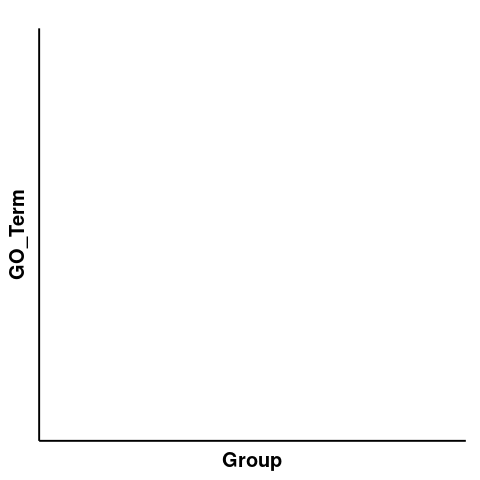

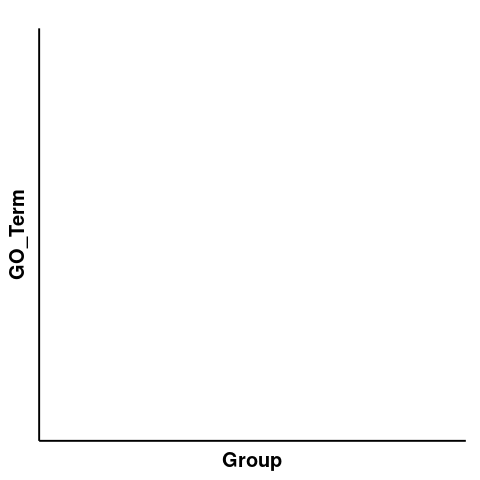

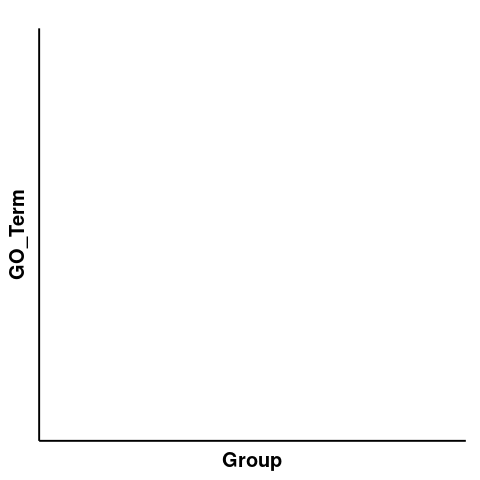

In [181]:
%%R
library('ggplot2')
library(stringr)

df<-read.table('data/enrichment/to_plot_GO.txt',sep='\t',header=T)

df1<-df[df$Group %in% c('Up_AM_Pre_vs_PM_Pre','Down_AM_Pre_vs_PM_Pre','Total_AM_Pre_vs_PM_Pre',
'Up_AM_Post_vs_PM_Post','Down_AM_Post_vs_PM_Post','Total_AM_Post_vs_PM_Post'),]
df1<-df1[df1$Term=='biological process',]
p1<-ggplot(data=df1,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))

df2<-df[df$Group %in% c('Up_AM_Pre_vs_PM_Pre','Down_AM_Pre_vs_PM_Pre','Total_AM_Pre_vs_PM_Pre',
'Up_AM_Post_vs_PM_Post','Down_AM_Post_vs_PM_Post','Total_AM_Post_vs_PM_Post'),]
df2<-df2[df2$Term=='cellular component',]
p2<-ggplot(data=df2,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))

df3<-df[df$Group %in% c('Up_AM_Pre_vs_PM_Pre','Down_AM_Pre_vs_PM_Pre','Total_AM_Pre_vs_PM_Pre',
'Up_AM_Post_vs_PM_Post','Down_AM_Post_vs_PM_Post','Total_AM_Post_vs_PM_Post'),]
df3<-df3[df3$Term=='molecular function',]
p3<-ggplot(data=df3,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))

df4<-df[df$Group %in% c('Up_AM_Pre_vs_AM_Post','Down_AM_Pre_vs_AM_Post','Total_AM_Pre_vs_AM_Post',
'Up_PM_Pre_vs_PM_Post','Down_PM_Pre_vs_PM_Post','Total_PM_Pre_vs_PM_Post'),]
df4<-df4[df4$Term=='biological process',]
p4<-ggplot(data=df4,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))

df5<-df[df$Group %in% c('Up_AM_Pre_vs_AM_Post','Down_AM_Pre_vs_AM_Post','Total_AM_Pre_vs_AM_Post',
'Up_PM_Pre_vs_PM_Post','Down_PM_Pre_vs_PM_Post','Total_PM_Pre_vs_PM_Post'),]
df5<-df5[df5$Term=='cellular component',]
p5<-ggplot(data=df5,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))

df6<-df[df$Group %in% c('Up_AM_Pre_vs_AM_Post','Down_AM_Pre_vs_AM_Post','Total_AM_Pre_vs_AM_Post',
'Up_PM_Pre_vs_PM_Post','Down_PM_Pre_vs_PM_Post','Total_PM_Pre_vs_PM_Post'),]
df6<-df6[df6$Term=='molecular function',]
p6<-ggplot(data=df6,aes(x=Group,y=GO_Term,color=P_value,size=E_ratio))+geom_point()+
    theme_Publication()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+scale_size(range = c(5, 20))


# pdf('data/enrichment/go_enrichment_1.pdf',width=14,height=14)
# print(p1)
# dev.off()

# pdf('data/enrichment/go_enrichment_2.pdf',width=14,height=14)
# print(p2)
# dev.off()

# pdf('data/enrichment/go_enrichment_3.pdf',width=14,height=14)
# print(p3)
# dev.off()

# pdf('data/enrichment/go_enrichment_4.pdf',width=14,height=14)
print(p4)
# dev.off()

# pdf('data/enrichment/go_enrichment_5.pdf',width=14,height=14)
print(p5)
# dev.off()

# pdf('data/enrichment/go_enrichment_6.pdf',width=14,height=14)
print(p6)
# dev.off()



## DEG heatmap

In [153]:
%%R
sample_info<-read.table('data/sample_info/to_diff.txt',sep='\t',header=T)
sample_info$Cate<-paste(sample_info$Time,sample_info$Group,sep='_')
sample_info[sample_info$Treated=='','Treated']<-'NA'
sample_info$Patient<-apply(sample_info,1,function(x) strsplit(x[1],'_')[[1]][1]) 

quality<-read.table('data/sample_info/quality.txt',sep='\t',header=T)
rownames(quality)<-quality$Sample
sample_info[c('Quality', 'GC', 'Read_length')]<-quality[sample_info$Sample,c('Quality', 'GC', 'Read_length')]


kal_dirs <- file.path("data/kallisto", sample_info$Sample,'/abundance.h5')

t2g<-read.table('data/sample_info/t2g.txt',sep='\t',header=T)
protein_coding<-unique(t2g[t2g$TYPE=='protein_coding','GENEID'])
g2n<-t2g[,c('GENEID','GENENAME')]
g2n<-g2n[!duplicated(g2n$GENEID),]
t2g<-t2g[,c('TXNAME','GENEID')]
rownames(g2n)<-g2n$GENEID

# txi <- tximport(kal_dirs, type = "kallisto", tx2gene = t2g)
colnames(txi$abundance)<-sample_info$Sample

In [156]:
%%R
library(tidyr)
genes<-c()
for(contrast in c('AM_Pre_vs_AM_Post','PM_Pre_vs_PM_Post'))#c('AM_Pre_vs_PM_Pre','AM_Post_vs_PM_Post'))#
{
    genes_<-read.table(paste0('data/sample_info/Total_',contrast,'.csv'),sep=',',header=F)
    genes_<-genes_[,1]
    genes<-c(genes,genes_)
}
abundance<-txi$abundance
abundance<-as.data.frame(abundance)

keep<-rowSums(abundance > 5) >= 41
abundance<-abundance[keep,]

abundance<-abundance[rownames(abundance) %in% protein_coding,]
abundance %>% drop_na()
gene_cvs<-apply(abundance,1,function(x) sd(x)/mean(x))
# remove genes with NaN cv
gene_cvs<-gene_cvs[!is.nan(gene_cvs)]
# get genes with highest cv
gene_cvs<-gene_cvs[rev(order(gene_cvs))]
gene_cvs<-gene_cvs[1:1000]
# get gene names
gene_cvs<-as.data.frame(gene_cvs)
gene_cvs$Gene<-rownames(gene_cvs)

zscores<-t(scale(t(abundance[gene_cvs$Gene,])))
zscores<-as.data.frame(zscores)
corr_matrix <- cor(zscores)

column_ha=HeatmapAnnotation(
  Group = sample_info$Group,
  Time=sample_info$Time,
  Treated=sample_info$Treated,
  Smoke=sample_info$Smoke,
  Pulmonary.Disease=sample_info$Pulmonary.Disease,
  Renal.Disease=sample_info$Renal.Disease,
  Read_length=sample_info$Read_length
)

hm<-Heatmap(corr_matrix,top_annotation = column_ha,cluster_rows=T,cluster_columns=T,show_row_names = F,show_column_names =F,show_row_dend=F,)
pdf('data/figures/sample_cor.pdf',width=10,height=10)
draw(hm)
dev.off()

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.



png 
  2 


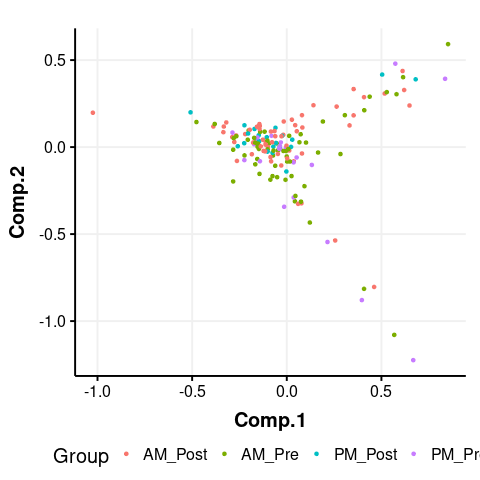

In [142]:
%%R
sample_info$Cate<-paste(sample_info$Time,sample_info$Group,sep='_')

data.pca <- as.data.frame(princomp(corr_matrix)$scores)
data.pca$Group<-sample_info$Cate
ggplot(data.pca, aes(x=Comp.1, y=Comp.2,color=Group)) + geom_point() + theme_Publication()


R[write to console]: The automatically generated colors map from the 1^st and 99^th of the
values in the matrix. There are outliers in the matrix whose patterns
might be hidden by this color mapping. You can manually set the color
to `col` argument.

Use `suppressMessages()` to turn off this message.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.

R[write to console]: Following `at` are removed: NA, because no color was defined for them.



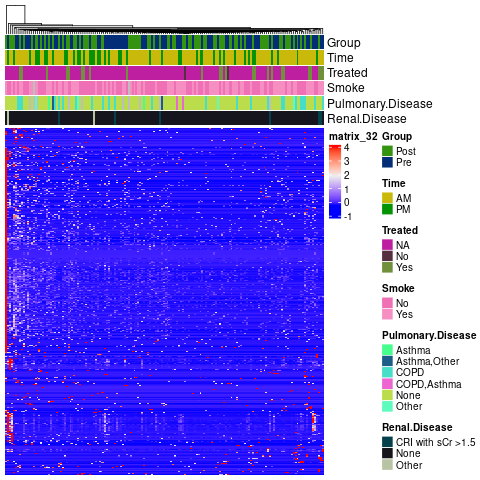

In [132]:
%%R

column_ha=HeatmapAnnotation(
  Group = sample_info$Group,
  Time=sample_info$Time,
  Treated=sample_info$Treated,
  Smoke=sample_info$Smoke,
  Pulmonary.Disease=sample_info$Pulmonary.Disease,
  Renal.Disease=sample_info$Renal.Disease
)

hm<-Heatmap(zscores,top_annotation = column_ha,cluster_rows=T,cluster_columns=T,show_row_names = F,show_column_names =F,show_row_dend=F,)
draw(hm)